In [1]:
# standard import
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # whitegrid background to all plots
%matplotlib inline

In [3]:
# Lecture 22 import data
import pandas_datareader.data as web

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [10]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [11]:
AAPL= web.DataReader('WIKI/AAPL','quandl',start,end)


In [12]:
GOOG = web.DataReader('WIKI/GOOG','quandl',start,end)
MSFT = web.DataReader('WIKI/MSFT','quandl',start,end)
AMZ = web.DataReader('SSE/AMZ','quandl',start,end)

In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2018-03-27 to 2017-06-06
Data columns (total 12 columns):
Open          202 non-null float64
High          202 non-null float64
Low           202 non-null float64
Close         202 non-null float64
Volume        202 non-null float64
ExDividend    202 non-null float64
SplitRatio    202 non-null float64
AdjOpen       202 non-null float64
AdjHigh       202 non-null float64
AdjLow        202 non-null float64
AdjClose      202 non-null float64
AdjVolume     202 non-null float64
dtypes: float64(12)
memory usage: 20.5 KB


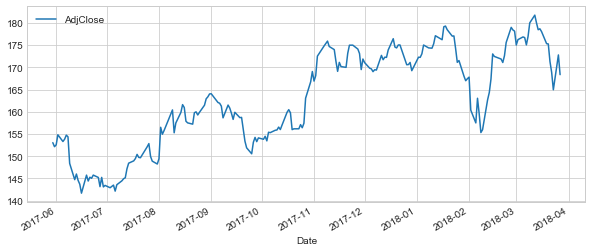

In [34]:
# plot adjusted closing price
AAPL['AdjClose'].plot(legend = True, figsize=(10,4)) # pandas has plot method

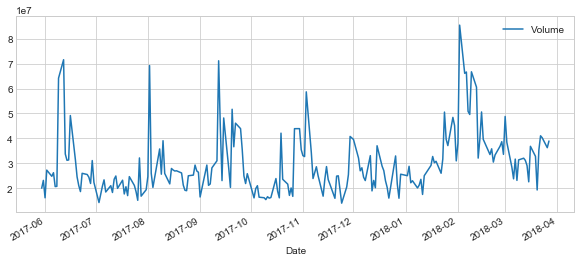

In [35]:
# plot volume
AAPL['Volume'].plot(legend = True, figsize = (10,4))

In [19]:
# moving averages
ma_day= [10,20,50]

for ma in ma_day:
    # make a string for each ma day
    column_name = "MA for %s days" %(str(ma))
    #make a new column for each ma 
    AAPL[column_name] = AAPL['AdjClose'].rolling(window=ma).mean()

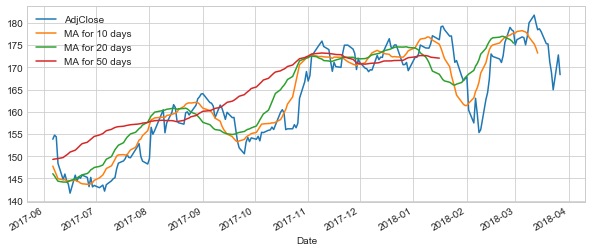

In [22]:
AAPL[['AdjClose','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize = (10,4))

when MA days are longer, the curve is smoother.

In [23]:
# daily returns
AAPL['Daily Return'] = AAPL['AdjClose'].pct_change()

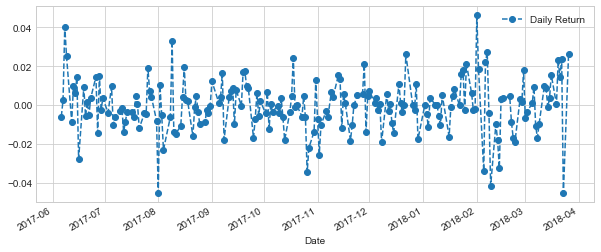

In [24]:
AAPL['Daily Return'].plot(figsize= (10,4),legend = True, linestyle='--',marker ='o')

C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


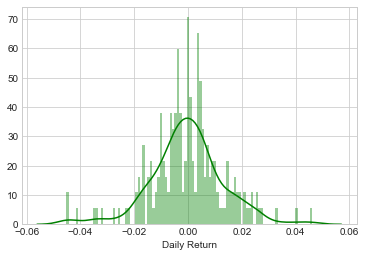

In [26]:
# two histogram on top of each other
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color = 'green')

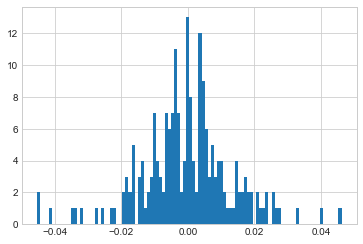

In [27]:
AAPL['Daily Return'].hist(bins = 100)

In [38]:
AAPL1 = DataFrame(AAPL['AdjClose'])

In [41]:
AAPL1.columns = ['AAPL']

In [43]:
GOOG1 = DataFrame(GOOG['AdjClose'])
GOOG1.columns = ['GOOG']

In [44]:
MSFT1 =DataFrame(MSFT['AdjClose'])
MSFT1.columns = ['MSFT']

In [46]:
AMZ1 =DataFrame(AMZ['Last'])
AMZ1.columns = ['AMZ']

In [48]:
# join the adjusted closing prices of the 4 stocks together
closing_df=pd.concat([AAPL1,GOOG1,MSFT1,AMZ1],axis = 1)

In [49]:
tech_rets = closing_df.pct_change()

In [50]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZ
Date,,,,
2017-06-06,NaN,NaN,NaN,NaN
2017-06-07,0.005957,0.004618,-0.001793,0.004331
2017-06-08,-0.002446,0.002375,-0.006147,0.006715
2017-06-09,-0.038777,-0.034146,-0.022587,-0.032682
2017-06-12,-0.024567,-0.007296,-0.007679,-0.013380


C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


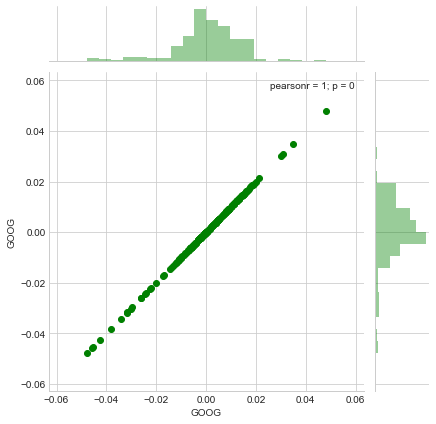

In [52]:
# compare daily returns
sns.jointplot('GOOG','GOOG', tech_rets, kind = 'scatter',color = 'green')

C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


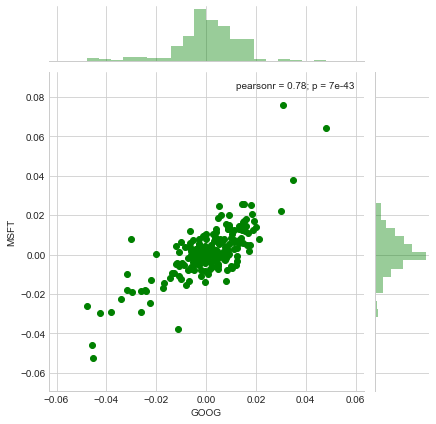

In [53]:
sns.jointplot('GOOG','MSFT', tech_rets, kind = 'scatter',color = 'green')

There seems to be a positive linear correlation between the daily returns of the two stocks. The Pearson's R is 0.78 and it is statistically significant.

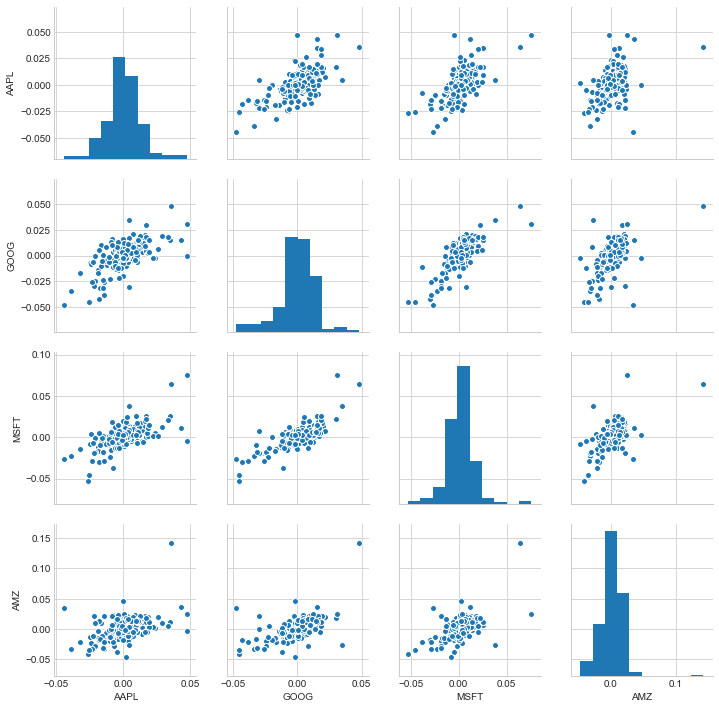

In [54]:
# do all the pairwise
sns.pairplot(tech_rets.dropna())

C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


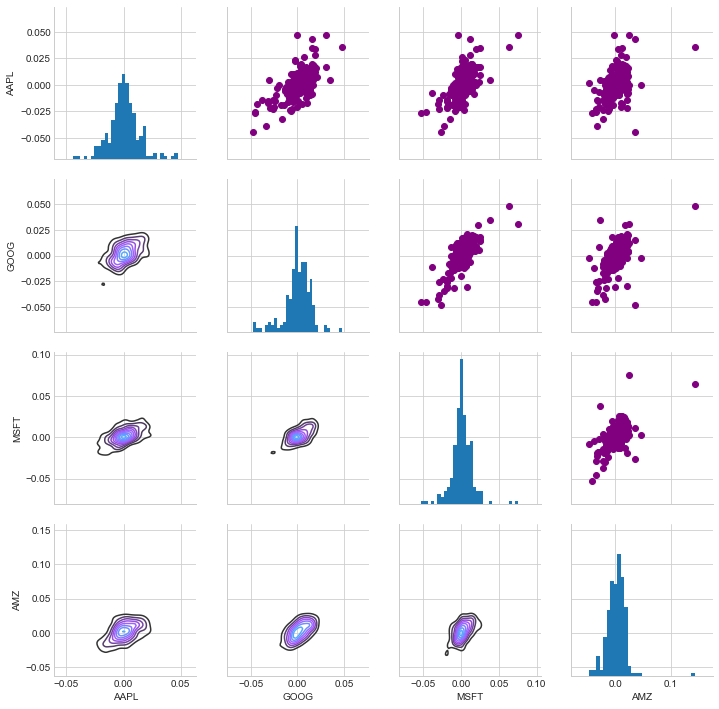

In [56]:
# more control
returns_fig = sns.PairGrid(tech_rets.dropna())
# upper triangle
returns_fig.map_upper(plt.scatter,color ='purple')
#lower triangle
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
# diagonal
returns_fig.map_diag(plt.hist,bins = 30)

C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


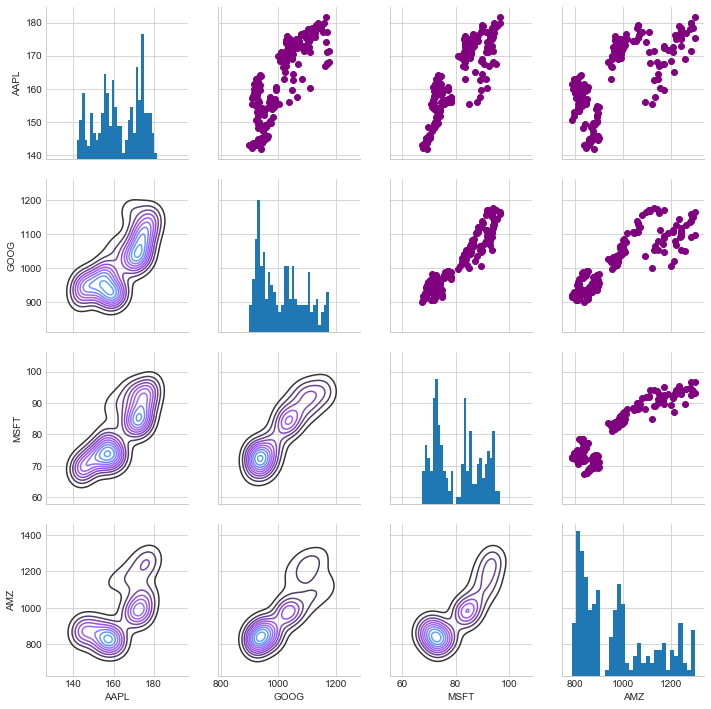

In [57]:
# more control
returns_fig = sns.PairGrid(closing_df.dropna())
# upper triangle
returns_fig.map_upper(plt.scatter,color ='purple')
#lower triangle
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
# diagonal
returns_fig.map_diag(plt.hist,bins = 30)

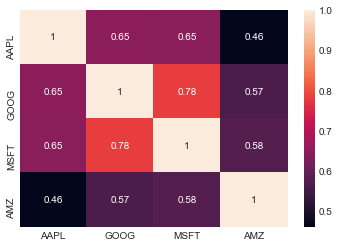

In [60]:
# correlation plot for daily returns
sns.heatmap(tech_rets.corr(),annot = True)

In [61]:
# Risk Analysis

rets = tech_rets.dropna()

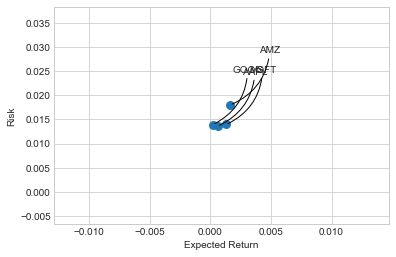

In [63]:
# look at expected return v.s. risk
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s= area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Value At Risk: the amount of money expected to be put at risk for a given confidence interval. <br><br>

Method 1: Bootstrap: calculate empirical quantiles from a histogram

C:\Users\Bingxin\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


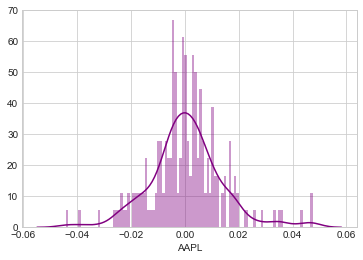

In [64]:
# dropna() used in sns
sns.distplot(rets['AAPL'],bins = 100, color='purple')

In [65]:
rets['AAPL'].quantile(0.05)

-0.020909064705020103

This means with 95% we know the expected loss would not go above 2.09%. If you have 1 million investement, our one-day 5 percent VAR is $20,900

Method 2: Monte Carlo Method

\Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t})

In [67]:
# time horizon for the simulation
days = 365

# delta t
#dt = 1/days

# expected returns mu
mu = rets.mean()['GOOG']
# std
sigma = rets.std()['GOOG']



In [68]:
# define a function
def stock_monte_carlo(start_price,days,mu,std):
    # define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    #shock array
    shock = np.zeros(days)
    #drift array
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x]=np.random.normal(loc = 0,scale = sigma)
        drift[x] =mu
        price[x] = price[x-1]+price[x-1]*(drift[x]+shock[x])
        
    return price

In [71]:
# start price
#GOOG.head()
start_price = 1005.10

Text(0.5,1,'Monte Carlo Analysis for Google Stock Price')

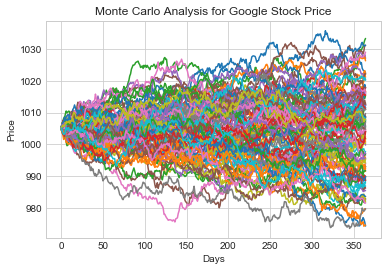

In [75]:
# the stock_monte_carlo returns the price array
# run the simulation 100 times
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google Stock Price')

In [79]:
# collect the end price from 10,000 runs
runs = 10000
simulations = np.zeros(runs)
for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

array([1005.06444671,  996.85930186, 1004.84020653, 1000.05600617])

Text(0.5,1,u'Final Price Distrn for Google after 365 days')

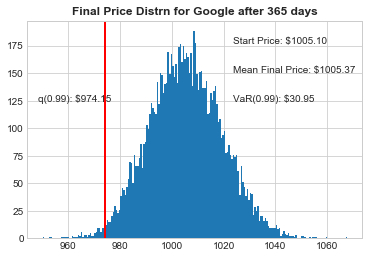

In [87]:
# 1% empirical quantile. 
q= np.percentile(simulations,1)
plt.hist(simulations,bins = 200)
# add text to the plot
plt.figtext(0.6,0.8,s = "Start Price: $%.2f" %start_price)
plt.figtext(0.6,0.7,s = "Mean Final Price: $%.2f" %simulations.mean())
plt.figtext(0.6,0.6,s= "VaR(0.99): $%.2f" %(start_price-q))
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)
# add a line at 1% percentile
plt.axvline(x= q, linewidth =2, color ='red')
# add title
plt.title(u"Final Price Distrn for Google after %s days" %days, weight = 'bold')